<a href="https://colab.research.google.com/github/tobiasschlagenhaufer/colab/blob/main/digit_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# scale value from 0-255 to 0-1
#   increased accuracy from 88% to 92%!!
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# 2 dimensional pixel/darkness representation of image
X_train[0]

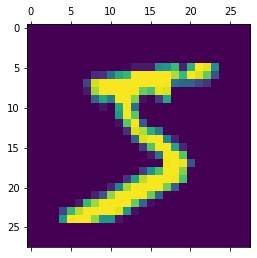

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
# reshape each image into 1 dimension for neural network
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [9]:
# define neural network
#   Dense: every neuron is connected to every other neuron
#   input_shape: the size of our input images (28*28)
#   output_shape: size of categories; 10 digits
#   sigmoid: s-shaped curve that will return a value between 0 and 1
model = keras.Sequential([
  keras.layers.Dense(10, input_shape=((28*28),), activation="sigmoid")
])

In [10]:
# sparse_categorical_crossentropy: not too sure on this, but used for loss where one-hot encoding isn't used, Y is an integer
model.compile(loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [11]:
# train the model to fit our training data
#   epochs: number of hidden layers - for me not much change after 2
model.fit(X_train_flat, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6663 - accuracy: 0.8290
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.9147
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2869 - accuracy: 0.9207


In [12]:
# try on our test data
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 946us/step - loss: 0.2820 - accuracy: 0.9235


[0.2819559574127197, 0.9235000014305115]

In [13]:
# what image to test for?
x = 2

In [ ]:
# make predictions 
y_pred = model.predict(X_test_flat)

plt.matshow(X_test[x])
for i in range(10):
  print(f"{i}: score = {y_pred[x][i]}")
print("Best: ", np.argmax(y_pred[x]))

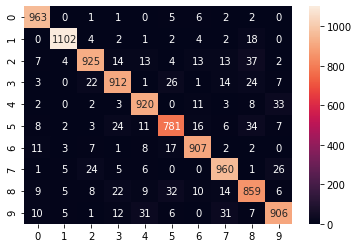

In [15]:
# confusion matrix
#   this will give a visual on how well the model performed

predicted = [np.argmax(x) for x in y_pred]
confusion = tf.math.confusion_matrix(labels=y_test, predictions=predicted)
import seaborn as sn
sn.heatmap(confusion, annot=True, fmt="d")